In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Setup the dataset

<class 'tuple'>


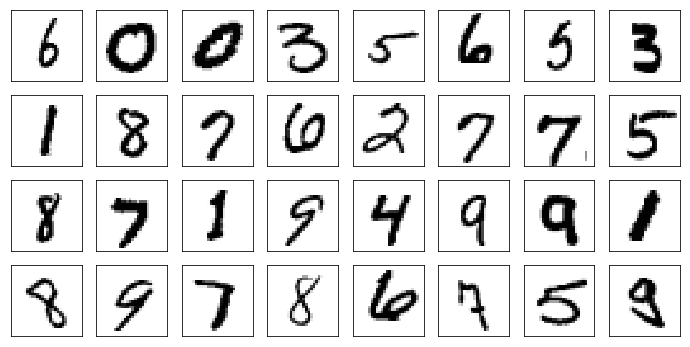

In [33]:
mnist_dataset = tfds.load('mnist')

ds_train = mnist_dataset['train']
ds_test = mnist_dataset['test']

ds_train = ds_train.map(lambda x: (tf.cast(x['image'], dtype=tf.float64)/255.0, 
                                   tf.cast(x['image'], dtype=tf.float64)/255.0))

batch_size = 32
ds_train = ds_train.shuffle(buffer_size=10000)
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.repeat()



fig = plt.figure(figsize=(12, 6))


batch, = ds_train.take(1)
print(type(batch))

for i,example in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(4, 8, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    image = example[0]
    ax.imshow(image[:, :, 0], cmap='gray_r')
    
plt.show()

## Build the model

In [65]:
encoder = tf.keras.layers.Dense(units=100, use_bias=False, activation='relu')

decoder = tf.keras.layers.Dense(units=784, use_bias=False, activation='linear')

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    encoder,
    decoder,
    tf.keras.layers.Reshape(target_shape=(28, 28, 1))
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               78400     
_________________________________________________________________
dense_19 (Dense)             (None, 784)               78400     
_________________________________________________________________
reshape_8 (Reshape)          (None, 28, 28, 1)         0         
Total params: 156,800
Trainable params: 156,800
Non-trainable params: 0
_________________________________________________________________


In [4]:
encoder(tf.reshape(batch[0], (32, -1)))

<tf.Tensor: id=734, shape=(32, 100), dtype=float32, numpy=
array([[0.        , 0.        , 1.0434357 , ..., 0.        , 0.        ,
        0.        ],
       [0.3676796 , 0.        , 0.        , ..., 0.        , 0.29831785,
        1.2031038 ],
       [0.        , 0.        , 0.6790781 , ..., 0.        , 0.54919434,
        0.01594645],
       ...,
       [0.15293549, 0.        , 0.22674006, ..., 0.        , 0.34405476,
        0.07251866],
       [0.6334442 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07137775],
       [0.2549927 , 0.        , 0.23071766, ..., 0.        , 0.3171379 ,
        0.        ]], dtype=float32)>

In [67]:
def build_model():
    encoder = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(units=100, use_bias=False, activation='relu')
    ])

    decoder = tf.keras.Sequential([
        tf.keras.layers.Dense(units=784, use_bias=False, activation='sigmoid'),
        tf.keras.layers.Reshape(target_shape=(28, 28, 1))
    ])

    model = tf.keras.Sequential([
        encoder,
        decoder,
    ])
    
    return model

model = build_model()
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_20 (Sequential)   (None, 100)               78400     
_________________________________________________________________
sequential_21 (Sequential)   (None, 28, 28, 1)         78400     
Total params: 156,800
Trainable params: 156,800
Non-trainable params: 0
_________________________________________________________________


In [28]:
encoder(batch[0])

<tf.Tensor: id=2073, shape=(32, 100), dtype=float32, numpy=
array([[0.15210739, 0.17888433, 0.03488563, ..., 0.        , 0.        ,
        0.19619474],
       [0.18215793, 0.22259258, 0.25006247, ..., 0.        , 0.        ,
        0.5323311 ],
       [0.19661996, 0.        , 0.6642134 , ..., 0.5456214 , 0.        ,
        0.39564973],
       ...,
       [0.19417731, 0.58385414, 0.04191582, ..., 0.15627345, 0.        ,
        0.        ],
       [0.19163123, 0.0110858 , 0.14028296, ..., 0.08671395, 0.2738879 ,
        0.51662916],
       [0.        , 0.17412499, 0.        , ..., 0.39051226, 0.        ,
        0.27791464]], dtype=float32)>

In [30]:
model(batch[0]).shape

TensorShape([32, 28, 28, 1])

## Compile

In [60]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

In [61]:
steps_per_epoch = np.ceil(50000 / batch_size)

history = model.fit(ds_train, epochs=5, steps_per_epoch=steps_per_epoch)

Epoch 1/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0197 - mae: 0.0618 - mse: 0.0197
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0076 - mae: 0.0321 - mse: 0.0076
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0058 - mae: 0.0269 - mse: 0.0058
Epoch 4/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0051 - mae: 0.0246 - mse: 0.0051
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0047 - mae: 0.0234 - mse: 0.0047


In [56]:
history.history

{'loss': [0.01919132571545878,
  0.007092646100592305,
  0.0053970400440332056,
  0.004662511775374975,
  0.0042391443072138345],
 'mae': [0.06096928, 0.031197969, 0.026148649, 0.023910373, 0.022605013],
 'mse': [0.019191323, 0.0070926514, 0.0053970404, 0.004662511, 0.004239142]}

## Reconstruct some test images

<class 'tensorflow.python.framework.ops.EagerTensor'> (10, 28, 28, 1)


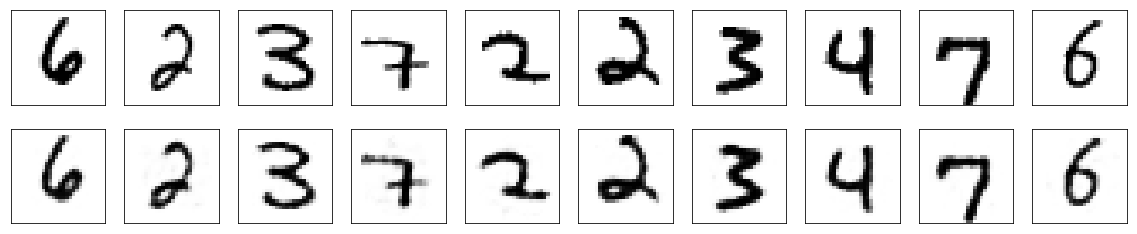

In [62]:
ds_test = mnist_dataset['test']

ds_test = ds_test.map(lambda x: tf.cast(x['image'], dtype=tf.float64)/255.0)

ds_test = ds_test.batch(batch_size=10)


fig = plt.figure(figsize=(20, 4))


batch_test, = ds_test.take(1)
print(type(batch_test), batch_test.shape)

batch_test_rec = model.predict(batch_test)

for i, (img_orig, img_rec) in enumerate(zip(batch_test, batch_test_rec)):
    ax = fig.add_subplot(2, 10, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    #image = example[:, :, 0]
    ax.imshow(img_orig[:, :, 0], cmap='gray_r')

    ax = fig.add_subplot(2, 10, i+11)
    ax.set_xticks([]); ax.set_yticks([])
    #image = example[:, :, 0]
    ax.imshow(img_rec[:, :, 0], cmap='gray_r')

plt.show()

## Save the model

In [58]:
json_config = model.to_json()

with open('mnist-ae.json', 'w') as json_file:
    json_file.write(json_config)
    
model.save_weights('mnist-ae.h5', save_format='h5')

## Other loss functions

### User-defined example

In [68]:
## user-defined loss: defining the MSE loss

class MeanSquaredError(tf.keras.losses.Loss):
    def call(self, y_true, y_pred):
        y_pred = tf.convert_to_tensor(y_pred)
        y_true = tf.cast(y_true, y_pred.dtype)
        return tf.math.reduce_sum(tf.math.square(y_true - y_pred), 
                                  axis=-1, keepdims=False)

## try:    

model = build_model()

b_inp = batch[0]
b_rec = model(b_inp)


print(b_inp.shape, b_rec.shape)
mse_loss = MeanSquaredError()
mse_loss(y_true=b_inp, y_pred=b_rec)

(32, 28, 28, 1) (32, 28, 28, 1)


<tf.Tensor: id=350680, shape=(), dtype=float32, numpy=0.23282787>


Epoch 1/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0196 - mae: 0.0615 - mse: 0.0196
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0075 - mae: 0.0321 - mse: 0.0075
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0058 - mae: 0.0269 - mse: 0.0058
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0051 - mae: 0.0247 - mse: 0.0051
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0047 - mae: 0.0234 - mse: 0.0047



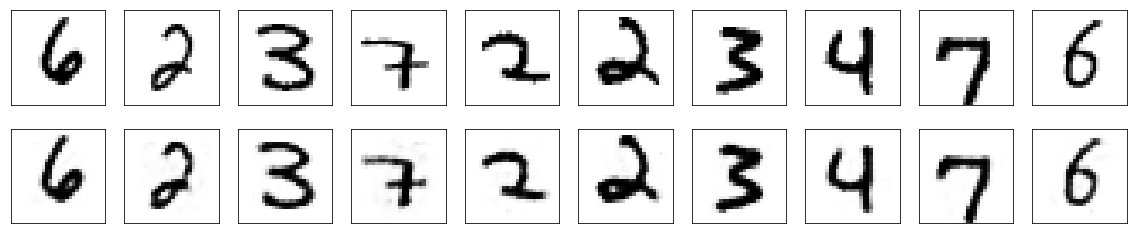

In [71]:
model = build_model()

model.compile(loss=MeanSquaredError(),
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

steps_per_epoch = np.ceil(50000 / batch_size)

history = model.fit(ds_train, epochs=5, steps_per_epoch=steps_per_epoch)


fig = plt.figure(figsize=(20, 4))


#batch_test, = ds_test.take(1)
#print(type(batch_test), batch_test.shape)

batch_test_rec = model.predict(batch_test)

for i, (img_orig, img_rec) in enumerate(zip(batch_test, batch_test_rec)):
    ax = fig.add_subplot(2, 10, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    #image = example[:, :, 0]
    ax.imshow(img_orig[:, :, 0], cmap='gray_r')

    ax = fig.add_subplot(2, 10, i+11)
    ax.set_xticks([]); ax.set_yticks([])
    #image = example[:, :, 0]
    ax.imshow(img_rec[:, :, 0], cmap='gray_r')

plt.show()

### BCE-loss

In [73]:
bce_loss = tf.keras.losses.BinaryCrossentropy()

## try:    

model = build_model()

b_inp = batch[0]
b_rec = model(b_inp)


print(b_inp.shape, b_rec.shape)
bce_loss(y_true=b_inp, y_pred=b_rec)

(32, 28, 28, 1) (32, 28, 28, 1)


<tf.Tensor: id=437587, shape=(), dtype=float32, numpy=0.69482976>

Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1254 - mae: 0.0587 - mse: 0.0199
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0862 - mae: 0.0294 - mse: 0.0076
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0805 - mae: 0.0248 - mse: 0.0059
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0782 - mae: 0.0229 - mse: 0.0052
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0769 - mae: 0.0218 - mse: 0.0048


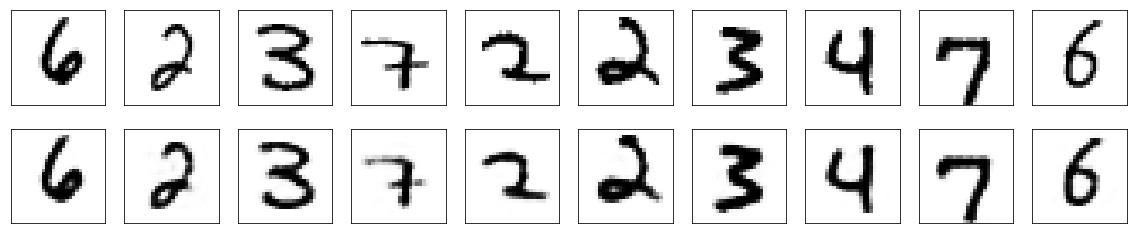

In [75]:
model = build_model()

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

steps_per_epoch = np.ceil(50000 / batch_size)

history = model.fit(ds_train, epochs=5, steps_per_epoch=steps_per_epoch)


fig = plt.figure(figsize=(20, 4))


#batch_test, = ds_test.take(1)
#print(type(batch_test), batch_test.shape)

batch_test_rec = model.predict(batch_test)

for i, (img_orig, img_rec) in enumerate(zip(batch_test, batch_test_rec)):
    ax = fig.add_subplot(2, 10, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img_orig[:, :, 0], cmap='gray_r')

    ax = fig.add_subplot(2, 10, i+11)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img_rec[:, :, 0], cmap='gray_r')

plt.show()